Original source = https://www.kaggle.com/code/theerawatra/new-melanoma/edit

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
train_path = 'd:/siim-isic-melanoma-classification/jpeg/train'

In [3]:
df=pd.read_csv('d:/siim-isic-melanoma-classification/train.csv')

In [4]:
df.head(5)

,image_name,patient_id,sex,age_approx,anatom_site_general_challenge,diagnosis,benign_malignant,target
0,ISIC_2637011,IP_7279968,male,45.0,head/neck,unknown,benign,0
1,ISIC_0015719,IP_3075186,female,45.0,upper extremity,unknown,benign,0
2,ISIC_0052212,IP_2842074,female,50.0,lower extremity,nevus,benign,0
3,ISIC_0068279,IP_6890425,female,45.0,head/neck,unknown,benign,0
4,ISIC_0074268,IP_8723313,female,55.0,upper extremity,unknown,benign,0


In [5]:
pos_pat_id=df[df.target==1].patient_id.unique()
pos_pat_id.size

428

In [6]:
df['ever_pos']=df['patient_id'].apply(lambda x:1 if x in pos_pat_id else 0)
df.head(2)

,image_name,patient_id,sex,age_approx,anatom_site_general_challenge,diagnosis,benign_malignant,target,ever_pos
0,ISIC_2637011,IP_7279968,male,45.0,head/neck,unknown,benign,0,0
1,ISIC_0015719,IP_3075186,female,45.0,upper extremity,unknown,benign,0,0


In [7]:
df[df.ever_pos==0].patient_id.value_counts()

IP_7279968    115
IP_4479736    115
IP_4382720    115
IP_0656529    114
IP_4488328    104
             ... 
IP_5188822      3
IP_7442038      3
IP_8137203      3
IP_3645134      3
IP_8335299      2
Name: patient_id, Length: 1628, dtype: int64

In [8]:
df_processed=pd.concat([df[df.target==1],df[df.ever_pos==0]]).sort_index()
df_processed

,image_name,patient_id,sex,age_approx,anatom_site_general_challenge,diagnosis,benign_malignant,target,ever_pos
0,ISIC_2637011,IP_7279968,male,45.0,head/neck,unknown,benign,0,0
1,ISIC_0015719,IP_3075186,female,45.0,upper extremity,unknown,benign,0,0
2,ISIC_0052212,IP_2842074,female,50.0,lower extremity,nevus,benign,0,0
4,ISIC_0074268,IP_8723313,female,55.0,upper extremity,unknown,benign,0,0
5,ISIC_0074311,IP_2950485,female,40.0,lower extremity,unknown,benign,0,0
...,...,...,...,...,...,...,...,...,...
33118,ISIC_9998937,IP_3091321,male,40.0,head/neck,nevus,benign,0,0
33120,ISIC_9999127,IP_9583707,male,20.0,torso,unknown,benign,0,0
33121,ISIC_9999134,IP_6526534,male,50.0,torso,unknown,benign,0,0
33122,ISIC_9999320,IP_3650745,male,65.0,torso,unknown,benign,0,0


In [9]:
df_processed.value_counts(['target'])

target
0         26199
1           584
dtype: int64

In [10]:
def split(df,train_size,stratify_label,randomstate=42):
    
    from sklearn.model_selection import train_test_split
    
    train,valid=train_test_split(df,train_size=train_size,stratify=df[stratify_label],random_state=randomstate)
    
    positive_index=train[train[stratify_label]==1].index.tolist()
    random_negative_index=train[train[stratify_label]==0].sample(len(positive_index),random_state=randomstate).index.tolist()
    
    balanced_train=train.loc[positive_index+random_negative_index]
    
    return balanced_train,valid

In [11]:
## I can change the train_size in compared to valid size if i am going to use validation
splitting=split(df_processed,train_size=0.99,stratify_label='target')
train,valid=splitting
for dataframe in splitting:
    print(dataframe['target'].value_counts(),end='\n\n')

1    578
0    578
Name: target, dtype: int64

0    262
1      6
Name: target, dtype: int64



In [12]:
import shutil
import os
train_path = 'd:/siim-isic-melanoma-classification/jpeg/train'
model_path = 'model_images'

In [13]:
def prepare_dirs(directory,dataframe,target_column):
    target_classes=dataframe[target_column].unique().tolist()
    if directory in os.listdir():
        shutil.rmtree(directory)
    os.mkdir(directory)
    for use in 'train','valid':
        os.mkdir(f'{directory}/{use}')
        for x in target_classes:
            os.mkdir(f'{directory}/{use}/{x}')

In [14]:
prepare_dirs(model_path,df_processed,'target')

In [15]:
df_processed.head(2)

,image_name,patient_id,sex,age_approx,anatom_site_general_challenge,diagnosis,benign_malignant,target,ever_pos
0,ISIC_2637011,IP_7279968,male,45.0,head/neck,unknown,benign,0,0
1,ISIC_0015719,IP_3075186,female,45.0,upper extremity,unknown,benign,0,0


In [16]:
for i,ddf in enumerate(splitting):
    phase={0:'train',1:'valid'}
    phase=phase[i]
    ddf.apply(lambda x: shutil.copy2(f'{train_path}/{x[0]}.jpg',f'{model_path}/{phase}/{x[-1]}'),axis=1)

In [18]:
#### Test CSV File
data_dir ='d:/siim-isic-melanoma-classification'
df_test = pd.read_csv(os.path.join(data_dir, 'test.csv'))
df_test.head(1)

,image_name,patient_id,sex,age_approx,anatom_site_general_challenge
0,ISIC_0052060,IP_3579794,male,70.0,NaN


In [19]:
df_test['filepath'] = df_test['image_name'].apply(lambda x: os.path.join(data_dir, 'test', f'{x}.jpg'))
df_test.head(3)

,image_name,patient_id,sex,age_approx,anatom_site_general_challenge,filepath
0,ISIC_0052060,IP_3579794,male,70.0,NaN,d:/siim-isic-melanoma-classification\test\ISIC...
1,ISIC_0052349,IP_7782715,male,40.0,lower extremity,d:/siim-isic-melanoma-classification\test\ISIC...
2,ISIC_0058510,IP_7960270,female,55.0,torso,d:/siim-isic-melanoma-classification\test\ISIC...


In [20]:
## sample sumption
df_subm = pd.read_csv(os.path.join(data_dir, 'sample_submission.csv'))
df_subm.head(3)

,image_name,target
0,ISIC_0052060,0
1,ISIC_0052349,0
2,ISIC_0058510,0


In [21]:
#IMPORT LIBRARIES
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms, models # add models to the list
from torchvision.utils import make_grid
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

In [22]:
import random
random.seed(42)
import numpy as np
np.random.seed(42)
import torch
torch.manual_seed(42)

In [23]:
# Define Transformers
train_transform = transforms.Compose([
        transforms.RandomRotation(10),      # rotate +/- 10 degrees
        transforms.RandomHorizontalFlip(),  # reverse 50% of images
        transforms.Resize(224),             # resize shortest side to 300 pixels
        transforms.CenterCrop(224),         # crop longest side to 300 pixels at center
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406],
                             [0.229, 0.224, 0.225])
    ])

test_transform = transforms.Compose([
        transforms.Resize(224),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406],
                             [0.229, 0.224, 0.225])
    ])

In [24]:
train_data = datasets.ImageFolder('./model_images/train', transform=train_transform)
val_data = datasets.ImageFolder('./model_images/valid', transform=test_transform)
#test_data = datasets.ImageFolder('../input/siim-isic-melanoma-classification/jpeg/test', transform=test_transform)

torch.manual_seed(42)
train_loader = DataLoader(train_data, batch_size=64, shuffle=True , pin_memory=True)
val_loader = DataLoader(val_data, batch_size=64, shuffle=True)
#test_loader = DataLoader(test_data, batch_size=10, shuffle=True)

class_names = train_data.classes

print(class_names)
print(f'Training images available: {len(train_data)}')
print(f'Validation images available: {len(val_data)}')
#print(f'Testing images available:  {len(test_data)}')

['0', '1']
Training images available: 1156
Validation images available: 268


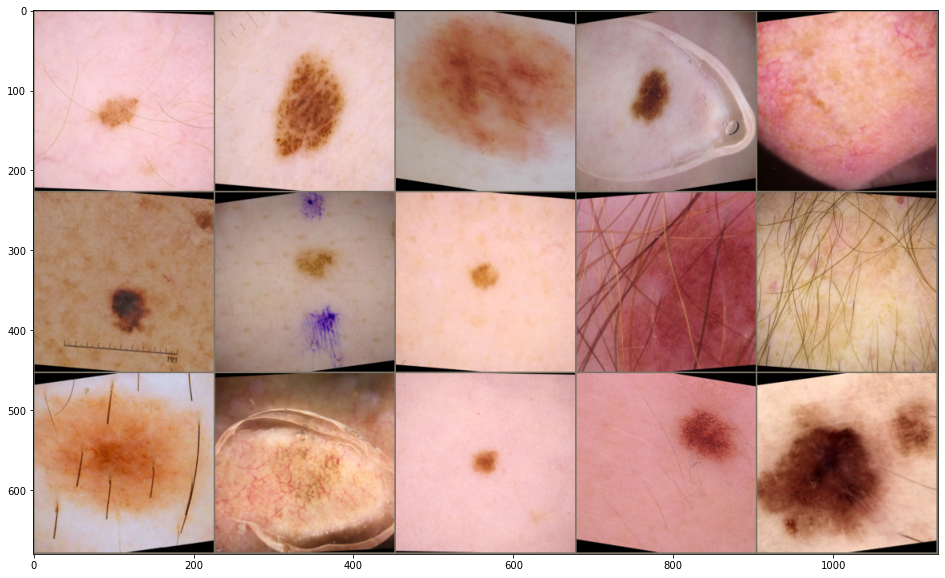

In [25]:
# Grab the first batch of 64 images
for images,labels in train_loader: 
    break


im = make_grid(images[:15], nrow=5)  # the default nrow is 8

# Inverse normalize the images
inv_normalize = transforms.Normalize(
    mean=[-0.485/0.229, -0.456/0.224, -0.406/0.225],
    std=[1/0.229, 1/0.224, 1/0.225]
)
im_inv = inv_normalize(im)

# Print the images
plt.figure(figsize=(20,10))
plt.imshow(np.transpose(im_inv.numpy(), (1, 2, 0)));
#plt.imshow(im.permute(1,2,0))

In [26]:
####Training Function#######

from tqdm.notebook import tqdm,trange
def train(n_epochs, train_loader, val_loader, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf
    losses=np.zeros((n_epochs,2))

    for epoch in trange(n_epochs):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0

        ###################
        # train the model #
        ###################
        # set the module to training mode
        model.train()
        for data, target in train_loader:
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()

            optimizer.zero_grad()
            with torch.cuda.amp.autocast():
                out = model(data)
                loss = criterion(out, target.unsqueeze(1).float())
            train_loss += loss.item()
            
            
            scaler.scale(loss).backward()
            scaler.step(optimizer)
            scaler.update()
            
            
        train_loss /= len(train_loader)
        print(f'Epoch: {epoch+1} \tTraining Loss: {train_loss:.6f} \t',end='')

        ######################
        # validate the model #
        ######################
        # set the model to evaluation mode
        model.eval()
        for data, target in val_loader:
            with torch.no_grad():
                # move to GPU
                if use_cuda:
                    data, target = data.cuda(), target.cuda()
                
                with torch.cuda.amp.autocast():
                    val_out = model(data)
                    loss = criterion(val_out, target.unsqueeze(1).float())
                valid_loss += loss.item()

        valid_loss /= len(val_loader)
        losses[epoch]=(train_loss,valid_loss)

        # print training/validation statistics
        print(f'Validation Loss: {valid_loss:.6f}')

        if valid_loss <= valid_loss_min:
            print('Validation loss decreased ... Model saved ...')
            valid_loss_min = valid_loss
            torch.save(model.state_dict(), save_path)

    return model, losses

In [27]:
use_cuda = torch.cuda.is_available()
use_cuda

True

In [36]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
## Modify the classifier
model = models.googlenet(pretrained=True)
## model = models.googlenet(pretrained=False)
model.fc = nn.Sequential(nn.Linear(1024, 128 , bias= False),
                                 nn.BatchNorm1d(128),
                                 nn.ReLU(),
                                 nn.Dropout(0.25),
                                 nn.Linear(128, 1),
                                 )

Downloading: "https://download.pytorch.org/models/googlenet-1378be20.pth" to C:\Users\ramch/.cache\torch\hub\checkpoints\googlenet-1378be20.pth


  0%|          | 0.00/49.7M [00:00<?, ?B/s]

In [37]:
criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
scaler=torch.cuda.amp.GradScaler()

In [38]:
####TRAINING####
import time
start_time = time.time()
if use_cuda:
    model = model.cuda()

In [39]:
epochs = 1
model, losses = train(epochs,train_loader, val_loader, model, optimizer, criterion , use_cuda, 'model_melanoma.pt')
model.load_state_dict(torch.load('model_melanoma.pt'))

print(f'\nDuration: {time.time() - start_time:.0f} seconds') # print the time elapsed

  0%|          | 0/1 [00:00<?, ?it/s]

Epoch: 1 	Training Loss: 0.533694 	Validation Loss: 0.780172
Validation loss decreased ... Model saved ...

Duration: 290 seconds


In [40]:
### Train function without Validation

####Training Function#######

from tqdm.notebook import tqdm,trange
def train2(n_epochs, train_loader, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf
    losses=np.zeros((n_epochs,1))

    for epoch in trange(n_epochs):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0

        ###################
        # train the model #
        ###################
        # set the module to training mode
        model.train()
        for data, target in train_loader:
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()

            optimizer.zero_grad()
            with torch.cuda.amp.autocast():
                out = model(data)
                loss = criterion(out, target.unsqueeze(1).float())
            train_loss += loss.item()
            
            
            scaler.scale(loss).backward()
            scaler.step(optimizer)
            scaler.update()
            
            
        train_loss /= len(train_loader)
        print(f'Epoch: {epoch+1} \tTraining Loss: {train_loss:.6f} \t',end='')

        losses[epoch]=(train_loss)

        torch.save(model.state_dict(), save_path)

    return model, losses

In [41]:
#### TRAINING WITHOUT VALIDATION ####
import time
start_time = time.time()
if use_cuda:
    model = model.cuda()

epochs = 30
model, losses = train2(epochs,train_loader, model, optimizer, criterion , use_cuda, 'model_melanoma1.pt')
model.load_state_dict(torch.load('model_melanoma1.pt'))

print(f'\nDuration: {time.time() - start_time:.0f} seconds') # print the time elapsed

  0%|          | 0/30 [00:00<?, ?it/s]

Epoch: 1 	Training Loss: 0.433600 	Epoch: 2 	Training Loss: 0.401382 	Epoch: 3 	Training Loss: 0.383214 	Epoch: 4 	Training Loss: 0.374452 	Epoch: 5 	Training Loss: 0.393472 	Epoch: 6 	Training Loss: 0.357590 	Epoch: 7 	Training Loss: 0.348765 	Epoch: 8 	Training Loss: 0.337307 	Epoch: 9 	Training Loss: 0.334739 	Epoch: 10 	Training Loss: 0.402101 	Epoch: 11 	Training Loss: 0.389226 	Epoch: 12 	Training Loss: 0.393199 	Epoch: 13 	Training Loss: 0.356612 	Epoch: 14 	Training Loss: 0.358120 	Epoch: 15 	Training Loss: 0.330553 	Epoch: 16 	Training Loss: 0.273903 	Epoch: 17 	Training Loss: 0.230309 	Epoch: 18 	Training Loss: 0.228805 	Epoch: 19 	Training Loss: 0.238528 	Epoch: 20 	Training Loss: 0.289602 	Epoch: 21 	Training Loss: 0.296107 	Epoch: 22 	Training Loss: 0.207912 	Epoch: 23 	Training Loss: 0.230395 	Epoch: 24 	Training Loss: 0.243793 	Epoch: 25 	Training Loss: 0.246308 	Epoch: 26 	Training Loss: 0.217563 	Epoch: 27 	Training Loss: 0.281745 	Epoch: 28 	Training Loss: 0.222116 	E

In [43]:
from PIL import Image

model.load_state_dict(torch.load('./model_melanoma1.pt'))
model.eval()

def predict(image_name):
    path= f'd:/siim-isic-melanoma-classification/jpeg/test/{image_name}.jpg'
    with torch.no_grad():
        img=test_transform(Image.open(path)).unsqueeze(0).cuda()
        return model.forward(img).sigmoid().item()
    
predict('ISIC_0073313')

0.001145794871263206

In [44]:
#load the model
#model.load_state_dict(torch.load('./model_melanoma1.pt'))

#predict and add it to the dataframe to subbmit
import time
df_test['target'] = df_test['image_name'].apply(predict)

print(f'\nDuration: {time.time() - start_time:.0f} seconds') # print the time elapsed


Duration: 8341 seconds


In [45]:
df_test.head()

,image_name,patient_id,sex,age_approx,anatom_site_general_challenge,filepath,target
0,ISIC_0052060,IP_3579794,male,70.0,NaN,d:/siim-isic-melanoma-classification\test\ISIC...,0.005269
1,ISIC_0052349,IP_7782715,male,40.0,lower extremity,d:/siim-isic-melanoma-classification\test\ISIC...,0.000611
2,ISIC_0058510,IP_7960270,female,55.0,torso,d:/siim-isic-melanoma-classification\test\ISIC...,0.008385
3,ISIC_0073313,IP_6375035,female,50.0,torso,d:/siim-isic-melanoma-classification\test\ISIC...,0.001146
4,ISIC_0073502,IP_0589375,female,45.0,lower extremity,d:/siim-isic-melanoma-classification\test\ISIC...,0.932464


In [46]:
# take just the 2 columns i need from the test ( Result)
subm =pd.DataFrame(df_test,columns=['image_name', 'target'])
subm.head(2)

,image_name,target
0,ISIC_0052060,0.005269
1,ISIC_0052349,0.000611


In [47]:
# save the o/p dataframe to csv file so i could download it to my computer or use it to submit
subm.to_csv('./sub.csv' , index = False)

In [ ]:
# When testing on test data and submitt the result to kaggle i got a private accuracy score of ( 0.8370 )